# LOAN PREDICTION HOMEWORK

Burada "loantrainingset.csv" dosyası ile Classification çalışması yapacağım.

### Data Dictionary

The dataset consists of the following fields:<br>
• **Loan ID**: A unique Identifier for the loan information.<br>
• **Customer ID**: A unique identifier for the customer. Customers may have more than one loan.<br>
• **Loan Status**: A categorical variable indicating if the loan was paid back or defaulted.<br>
• **Current Loan Amount**: This is the loan amount that was either completely paid off, or the amount that was defaulted.<br>
• **Term**: A categorical variable indicating if it is a short term or long term loan.<br>
• **Credit Score**: A value between 0 and 800 indicating the riskiness of the borrowers credit history.<br>
• **Years in current job**: A categorical variable indicating how many years the customer has been in their current job.<br>
• **Home Ownership**: Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". If the value is OWN, then the customer is a home owner with no mortgage<br>
• **Annual Income**: The customer's annual income<br>
• **Purpose**: A description of the purpose of the loan.<br>
• **Monthly Debt**: The customer's monthly payment for their existing loans<br>
• **Years of Credit History**: The years since the first entry in the customer’s credit history <br>
• **Months since last delinquent**: Months since the last loan delinquent payment<br>
• **Number of Open Accounts**: The total number of open credit cards<br>
• **Number of Credit Problems**: The number of credit problems in the customer records.<br>
• **Current Credit Balance**: The current total debt for the customer<br>
• **Maximum Open Credit**: The maximum credit limit for all credit sources.<br>
• **Bankruptcies**: The number of bankruptcies<br>
• **Tax Liens**: The number of tax liens.<br>

### Importing Packages

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier



### Reading Data   

In [67]:
df = pd.read_csv('LoansTrainingSet.csv')

### EDA Exploratory Data Analysis

In [68]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [69]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256983,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,27902,Long Term,678.0,10+ years,Home Mortgage,117480.0,Debt Consolidation,"$2,525.82",18.0,11.0,10,0,28317,62371,0.0,0.0


In [70]:
df.shape 

(256984, 19)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,256984.0,1.371331e+07,3.438131e+07,505.0,8299.0,14298.0,24367.0,99999999.0
Credit Score,195308.0,1.251116e+03,1.762017e+03,585.0,714.0,733.0,744.0,7510.0
Annual Income,195308.0,7.195272e+04,5.887757e+04,0.0,44321.0,61242.0,86462.0,8713547.0
Years of Credit History,256984.0,1.829019e+01,7.075747e+00,3.4,13.5,17.0,21.7,70.5
Months since last delinquent,116601.0,3.488145e+01,2.185417e+01,0.0,16.0,32.0,51.0,176.0
Number of Open Accounts,256984.0,1.110627e+01,4.982982e+00,0.0,8.0,10.0,14.0,76.0
Number of Credit Problems,256984.0,1.566284e-01,4.607309e-01,0.0,0.0,0.0,0.0,11.0
Current Credit Balance,256984.0,1.540656e+04,1.966506e+04,0.0,5974.0,11078.0,19319.0,1731412.0
Bankruptcies,256455.0,1.103156e-01,3.362287e-01,0.0,0.0,0.0,0.0,7.0
Tax Liens,256961.0,2.720257e-02,2.459499e-01,0.0,0.0,0.0,0.0,11.0


In [73]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [74]:
df['Loan Status'].value_counts()

Loan Status
Fully Paid     176191
Charged Off     80793
Name: count, dtype: int64

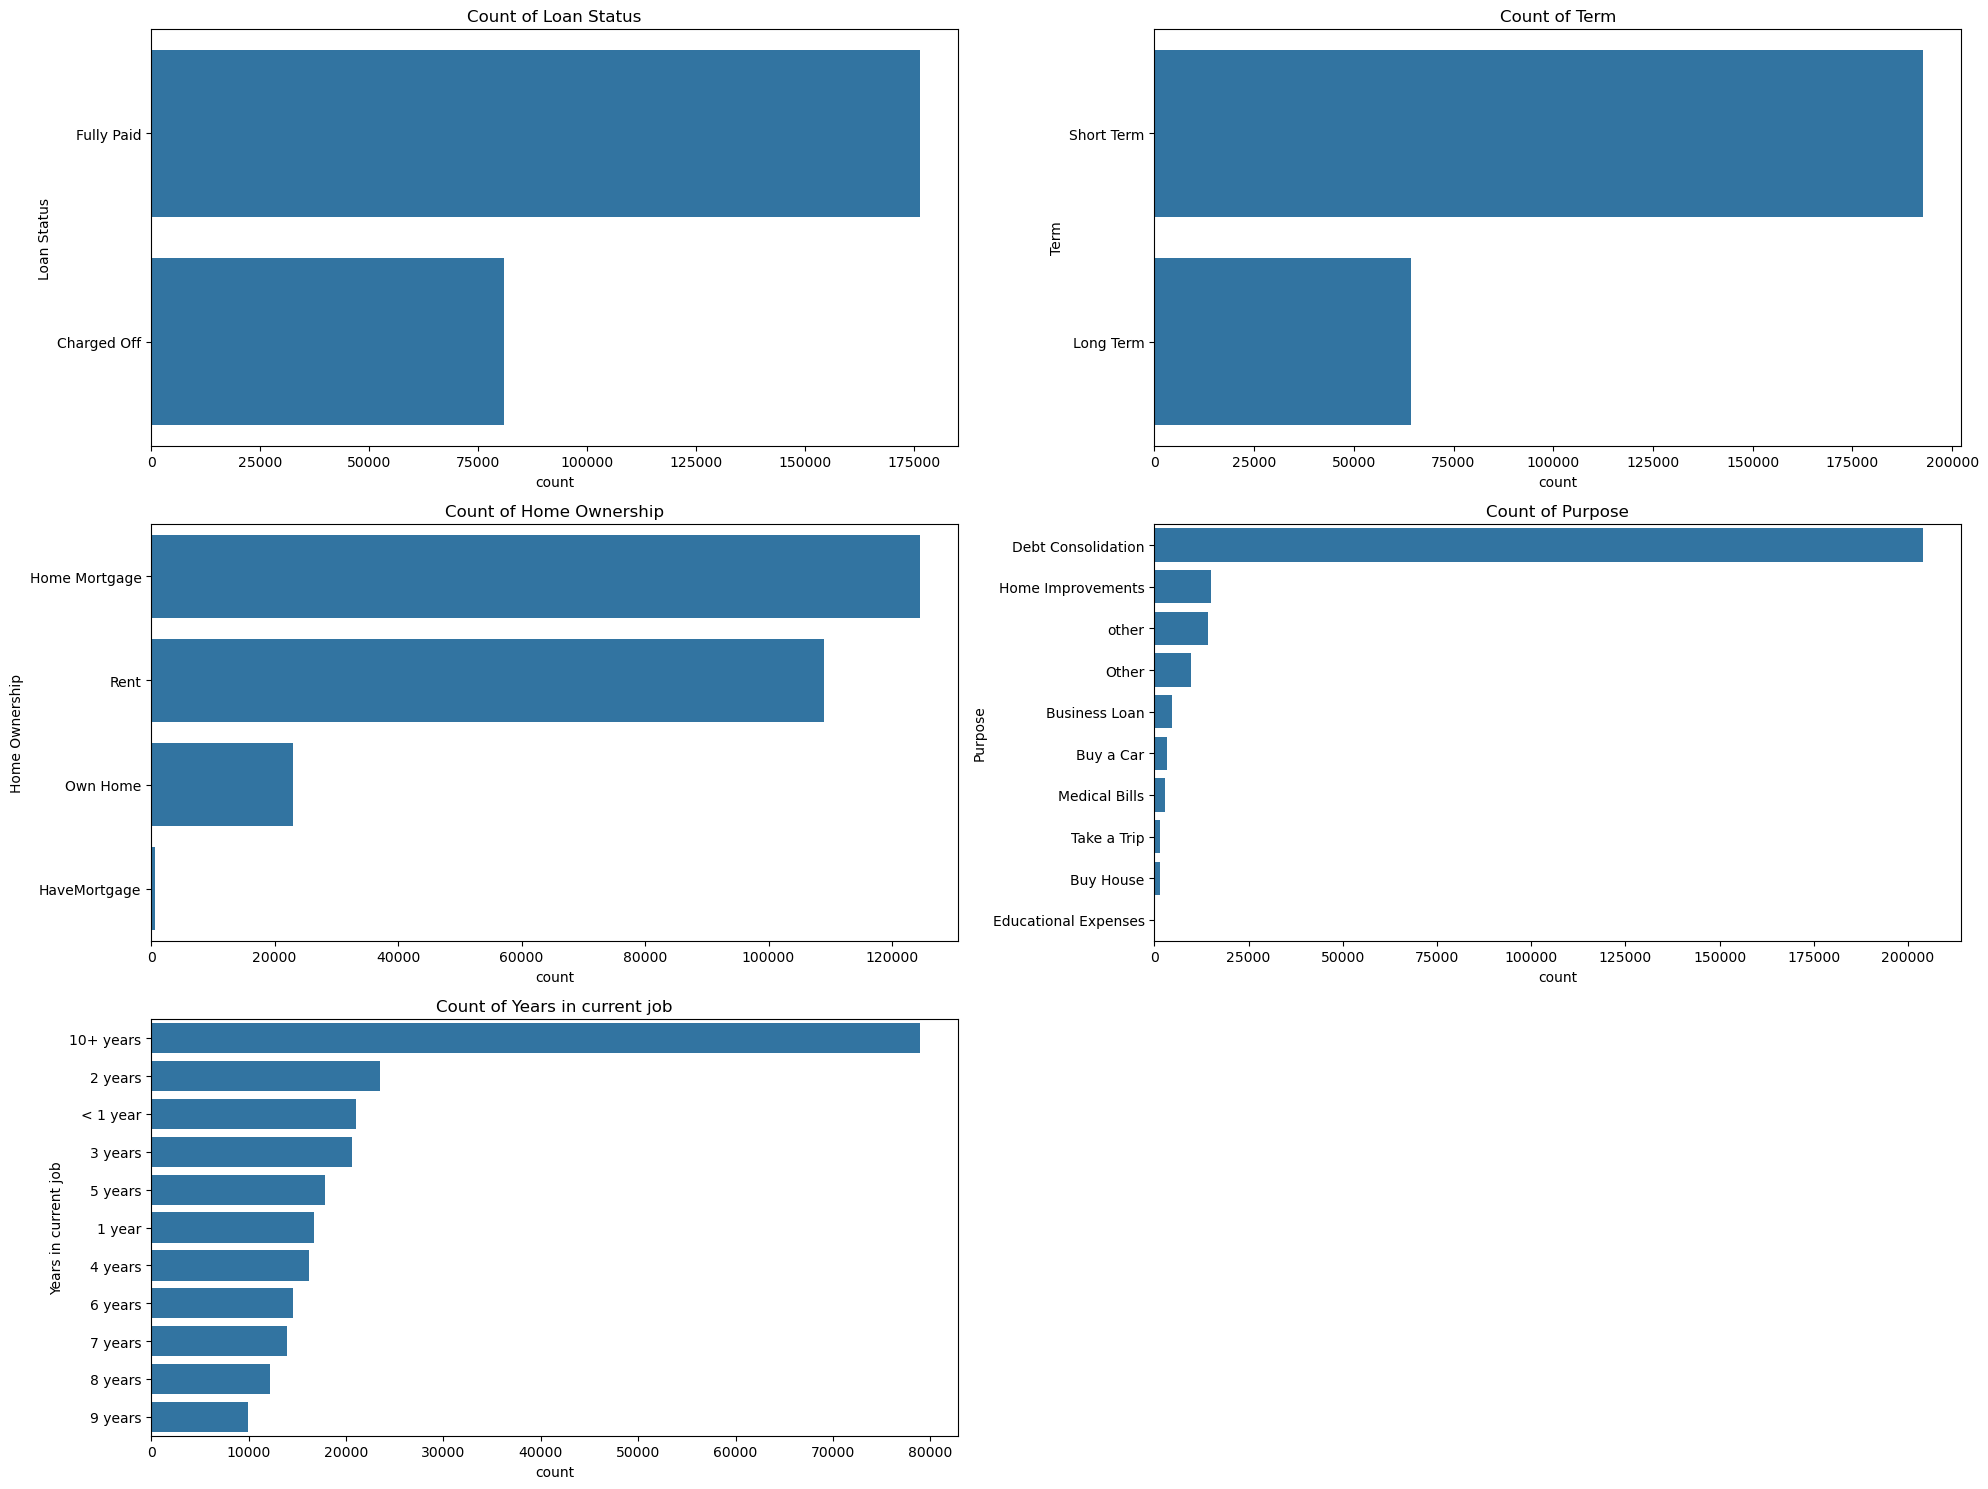

In [75]:
#made with ChatGPT
categorical_features = ['Loan Status', 'Term', 'Home Ownership', 'Purpose', 'Years in current job']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Count of {feature}')
plt.tight_layout()
plt.show()

### DATA MANIPULATION

In [76]:
missing_values_percentage = df.isnull().mean() * 100

In [77]:
missing_values_percentage.sort_values(ascending=False, inplace=True)
print(missing_values_percentage)

Months since last delinquent    54.627136
Credit Score                    23.999938
Annual Income                   23.999938
Years in current job             4.465648
Bankruptcies                     0.205849
Tax Liens                        0.008950
Years of Credit History          0.000000
Maximum Open Credit              0.000000
Current Credit Balance           0.000000
Number of Credit Problems        0.000000
Number of Open Accounts          0.000000
Loan ID                          0.000000
Monthly Debt                     0.000000
Customer ID                      0.000000
Home Ownership                   0.000000
Term                             0.000000
Current Loan Amount              0.000000
Loan Status                      0.000000
Purpose                          0.000000
dtype: float64


In [78]:
df["Tax Liens"].fillna(0.0, inplace=True)
df["Tax Liens"] = df["Tax Liens"].astype(int)

In [79]:
df["Bankruptcies"].fillna(0.0, inplace=True)
df["Bankruptcies"] = df["Bankruptcies"].astype(int)

In [80]:

df["Credit Score"] = df["Credit Score"].apply(lambda x: x / 10 if x > 1000 else x)

In [81]:
df['Maximum Open Credit'].replace('0', 0,inplace=True)
df['Maximum Open Credit'].replace('#VALUE!', np.nan,inplace=True)   
df['Maximum Open Credit'] = df['Maximum Open Credit'].astype(float)

In [82]:
df['Years in current job'] = df['Years in current job'].replace('< 1 year', '0', regex=True)

In [83]:
df['Years in current job'] = df['Years in current job'].str.extract('(\d+)', expand=False).astype(float)

In [84]:
df["Monthly Debt"] = df["Monthly Debt"].str.replace('$', '')

In [85]:
df["Monthly Debt"] = df["Monthly Debt"].str.replace(',', '')

In [86]:
df["Monthly Debt"] = df["Monthly Debt"].str.strip()

In [87]:
df["Monthly Debt"] = df["Monthly Debt"].astype(float)

In [89]:
df["Monthly Debt"] = df["Monthly Debt"].mask(df["Monthly Debt"] < 1, np.nan)

In [90]:
df['Purpose'].replace('other', 'Other',inplace=True)

In [91]:
df = df.drop(['Loan ID', 'Customer ID'], axis=1)

In [92]:
df["Current Loan Amount"] = df["Current Loan Amount"].replace(99999999, np.nan)

In [93]:
df.duplicated().sum() 
df.drop_duplicates()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,11520.0,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056.0,0,0
1,Fully Paid,3441.0,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,1106.04,26.3,NaN,17,0,6262,19149.0,0,0
2,Fully Paid,21029.0,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5,0,20967,28335.0,0,0
3,Fully Paid,18743.0,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9,0,22529,43915.0,0,0
4,Fully Paid,11731.0,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256977,Charged Off,11953.0,Short Term,717.0,10.0,Home Mortgage,39844.0,Debt Consolidation,982.82,11.7,NaN,9,1,4176,4783.0,1,0
256979,Fully Paid,3911.0,Short Term,NaN,2.0,Rent,NaN,Debt Consolidation,1706.58,19.9,NaN,16,0,43992,44080.0,0,0
256980,Fully Paid,5078.0,Short Term,737.0,10.0,Own Home,77186.0,Debt Consolidation,1376.47,19.1,47.0,9,0,1717,9758.0,0,0
256981,Charged Off,12116.0,Short Term,746.0,9.0,Home Mortgage,52504.0,Debt Consolidation,297.96,15.1,82.0,8,0,3315,20090.0,0,0


In [94]:
df.info(), df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256984 non-null  object 
 1   Current Loan Amount           221774 non-null  float64
 2   Term                          256984 non-null  object 
 3   Credit Score                  195308 non-null  float64
 4   Years in current job          245508 non-null  float64
 5   Home Ownership                256984 non-null  object 
 6   Annual Income                 195308 non-null  float64
 7   Purpose                       256984 non-null  object 
 8   Monthly Debt                  256723 non-null  float64
 9   Years of Credit History       256984 non-null  float64
 10  Months since last delinquent  116601 non-null  float64
 11  Number of Open Accounts       256984 non-null  int64  
 12  Number of Credit Problems     256984 non-nul

(None,
 Loan Status                          0
 Current Loan Amount              35210
 Term                                 0
 Credit Score                     61676
 Years in current job             11476
 Home Ownership                       0
 Annual Income                    61676
 Purpose                              0
 Monthly Debt                       261
 Years of Credit History              0
 Months since last delinquent    140383
 Number of Open Accounts              0
 Number of Credit Problems            0
 Current Credit Balance               0
 Maximum Open Credit                  4
 Bankruptcies                         0
 Tax Liens                            0
 dtype: int64)

### Filling Null Value

In [96]:
df["Current Loan Amount"].mean(),df["Current Loan Amount"].std(),df["Current Loan Amount"].max(),df["Current Loan Amount"].min(),df["Current Loan Amount"].median()

(13979.687388963539, 8260.519206804658, 41000.0, 505.0, 12058.0)

In [97]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

def fill_numeric_column(df, target_column, numeric_cols, categorical_cols):
    """
    Fill an empty numeric column in a dataframe using linear regression.

    Args:
        df (pandas.DataFrame): The input dataframe.
        target_column (str): The name of the empty numeric column to be filled.
        numeric_cols (list): The list of numeric columns in the dataframe.
        categorical_cols (list): The list of categorical columns in the dataframe.

    Returns:
        pandas.DataFrame: The updated dataframe with the target column filled.
    """
    # Create a list of columns without the target column
    cols_without_target = [col for col in df.columns if col != target_column]

    # Fill numeric columns with mean
    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].mean())

    # Fill categorical columns with mode and encode
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    # Split the dataframe into training and test sets based on the target column
    train_df = df[df[target_column].notna()]
    test_df = df[df[target_column].isna()]

    X_train = train_df[cols_without_target]
    y_train = train_df[target_column]
    X_test = test_df[cols_without_target]

    # Create a pipeline with an imputer and the LinearRegression estimator
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    model = Pipeline([('imputer', imputer), ('regressor', LinearRegression())])

    # Fit the model
    model.fit(X_train, y_train)

    # Predict the values for the test set
    y_pred = model.predict(X_test)
    df.loc[df[target_column].isna(), target_column] = y_pred

    # Combine the training and test sets
    df_filled = pd.concat([df[~df[target_column].isna()], df[df[target_column].isna()]], ignore_index=True)

    return df_filled

In [98]:
categorical_cols = ['Loan Status', 'Term', 'Home Ownership', 'Purpose']
numeric_cols = df.columns.drop(categorical_cols).drop(['Annual Income', 'Credit Score', 'Current Loan Amount', 'Years in current job'])

df1 = fill_numeric_column(df, 'Annual Income', numeric_cols, categorical_cols)
df2 = fill_numeric_column(df1, 'Credit Score', numeric_cols, categorical_cols)
df3 = fill_numeric_column(df2, 'Current Loan Amount', numeric_cols, categorical_cols)




In [99]:
df3.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Years in current job            11476
Home Ownership                      0
Annual Income                       0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
dtype: int64

In [101]:
df3 = df3.drop('Years in current job', axis=1)

In [102]:
df3.info()
df3.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256984 non-null  int64  
 1   Current Loan Amount           256984 non-null  float64
 2   Term                          256984 non-null  int64  
 3   Credit Score                  256984 non-null  float64
 4   Home Ownership                256984 non-null  int64  
 5   Annual Income                 256984 non-null  float64
 6   Purpose                       256984 non-null  int64  
 7   Monthly Debt                  256984 non-null  float64
 8   Years of Credit History       256984 non-null  float64
 9   Months since last delinquent  256984 non-null  float64
 10  Number of Open Accounts       256984 non-null  int64  
 11  Number of Credit Problems     256984 non-null  int64  
 12  Current Credit Balance        256984 non-nul

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [103]:
abs(df3.corr(numeric_only=True)["Loan Status"]).sort_values(ascending=False)

Loan Status                     1.000000
Credit Score                    0.293869
Term                            0.183811
Annual Income                   0.075070
Current Loan Amount             0.069978
Home Ownership                  0.067860
Years of Credit History         0.035548
Number of Open Accounts         0.020787
Monthly Debt                    0.016603
Months since last delinquent    0.015952
Tax Liens                       0.012590
Purpose                         0.012297
Number of Credit Problems       0.010179
Current Credit Balance          0.008838
Maximum Open Credit             0.007921
Bankruptcies                    0.001107
Name: Loan Status, dtype: float64

In [104]:
x = df3.drop("Loan Status", axis=1)  
y = df3[['Loan Status']]

In [105]:
x = pd.get_dummies(x, columns=['Term', 'Home Ownership','Purpose'], drop_first=True)

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        gnb=GaussianNB()
        bnb=BernoulliNB()
        lr=LogisticRegression()
        dt=DecisionTreeClassifier()
        rf=RandomForestClassifier()
        gbc=GradientBoostingClassifier()
        knc=KNeighborsClassifier()
        

       
        
        algos=[gnb,bnb,lr,dt,rf,gbc,knc]
        algo_names=['GaussianNB','BernoulliNB','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        confusion_matrixes= []
        classification_reports= []
        accuracy_scores=[]        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            classification_reports.append(classification_report(p , y_test))
            confusion_matrixes.append(confusion_matrix(p , y_test))
            accuracy_scores.append(accuracy_score(p , y_test))

        for i in range(len(algo_names)):
            print('Algorithm:'+ '\n' , algo_names[i])
            print('Confusion Matrix:'+ '\n' , confusion_matrixes[i])
            print('Classification Report: '+ '\n' , classification_reports[i])
            print('Accuracy Score:'+ '\n' , accuracy_scores[i])
            print('************************************************************')

In [107]:
algo_test(x,y)

Algorithm:
 GaussianNB
Confusion Matrix:
 [[14614 25297]
 [ 1547  9939]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.37      0.52     39911
           1       0.28      0.87      0.43     11486

    accuracy                           0.48     51397
   macro avg       0.59      0.62      0.47     51397
weighted avg       0.77      0.48      0.50     51397

Accuracy Score:
 0.4777127069673327
************************************************************
Algorithm:
 BernoulliNB
Confusion Matrix:
 [[ 2329  2034]
 [13832 33202]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.14      0.53      0.23      4363
           1       0.94      0.71      0.81     47034

    accuracy                           0.69     51397
   macro avg       0.54      0.62      0.52     51397
weighted avg       0.87      0.69      0.76     51397

Accuracy Score:
 0.6913049399770415
****************

In [110]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [111]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [112]:
pred = rf.predict(x_test)

In [113]:
accuracy_score(pred, y_test)

0.8760044360565792

In [114]:
confusion_matrix(pred, y_test)

array([[12338,  2550],
       [ 3823, 32686]])

<Axes: >

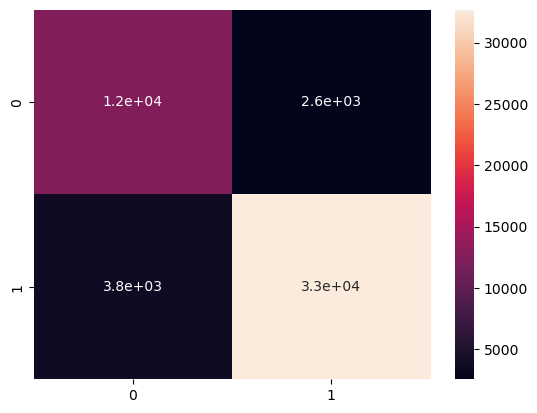

In [115]:
sns.heatmap(confusion_matrix(pred , y_test), annot=True)

In [116]:
print(classification_report(pred , y_test))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79     14888
           1       0.93      0.90      0.91     36509

    accuracy                           0.88     51397
   macro avg       0.85      0.86      0.85     51397
weighted avg       0.88      0.88      0.88     51397



## RESULT

%88 with RandomForestClassifier